
  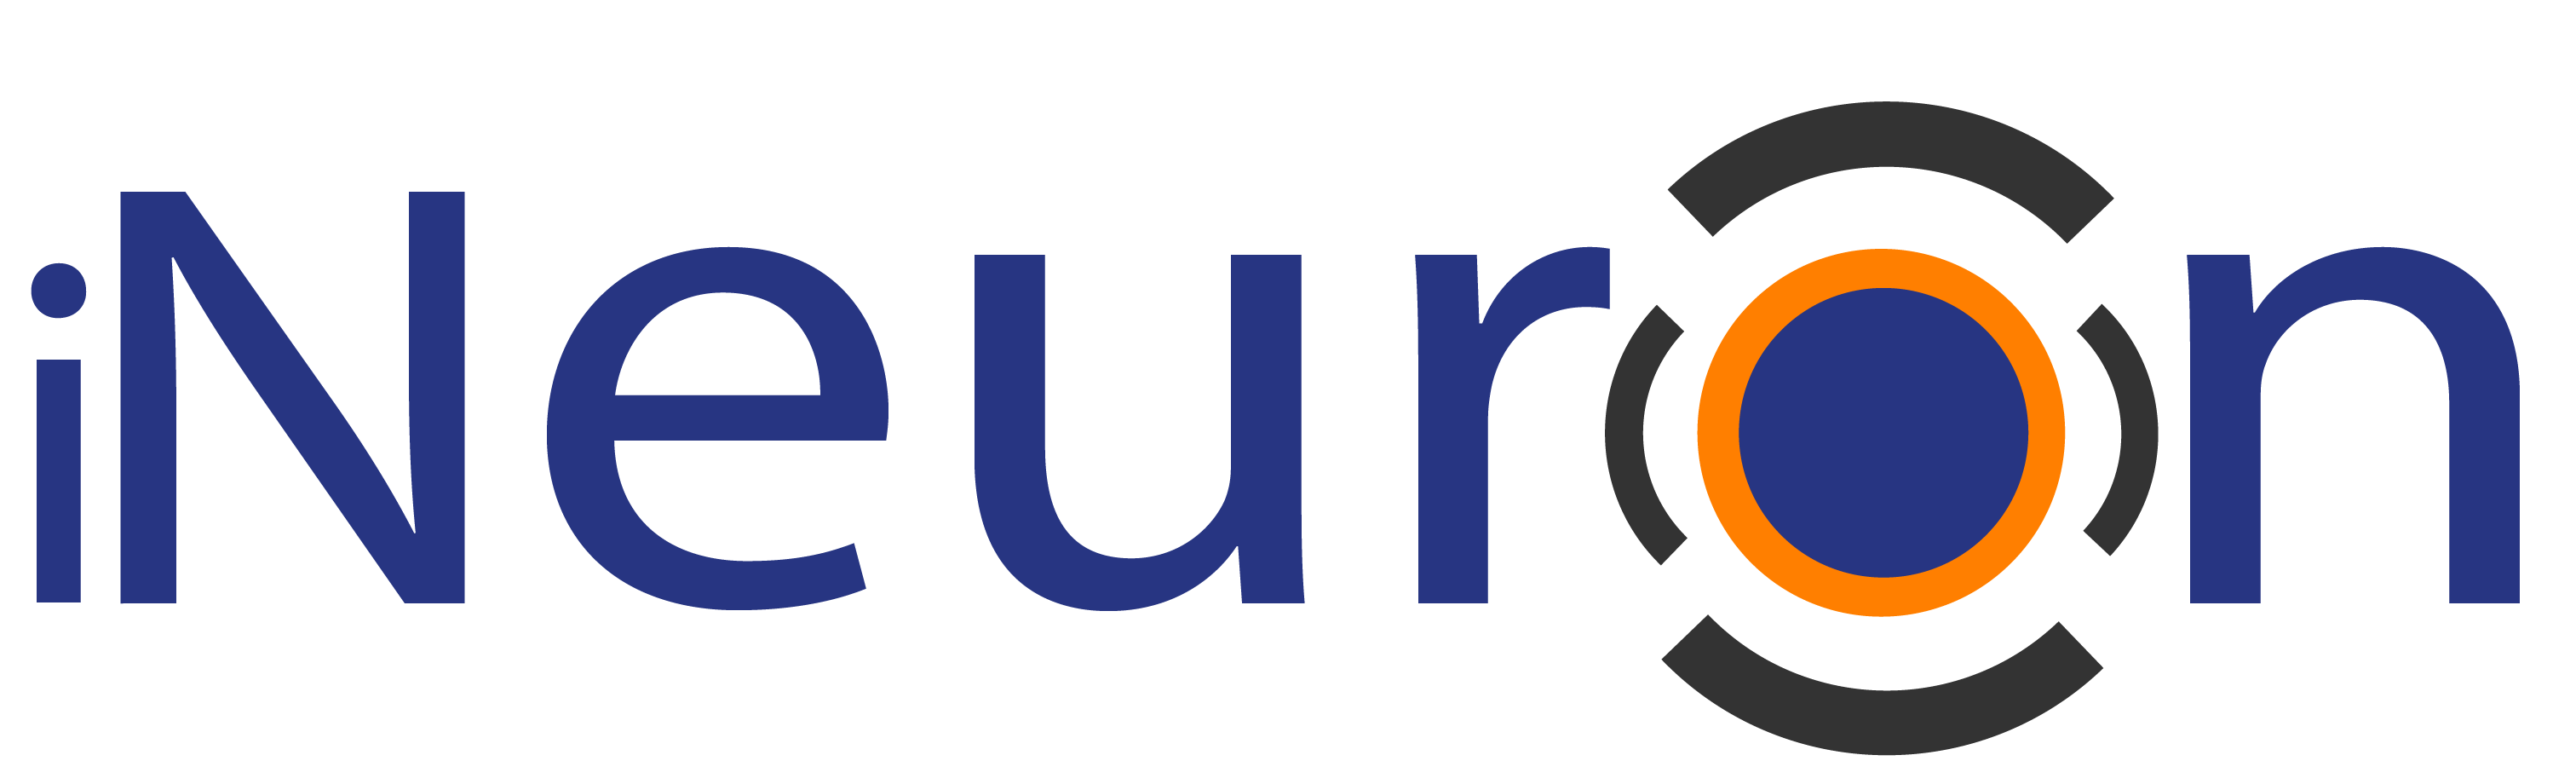

# Class - 65 `Deep Learning`  

## 04 February 2023
In this class **Boktiar Ahmed Bappy** taught the theory of **LeNet- 5**

**Agenda of the class :**
* **CNN Architecture**
* **Basic of CNN** $\rightarrow$ Vanilla
* **Lenet- 5**
* **Alexnet**

## Alexnet
Alexnet was designed by Godffrey Hinton, winner of the 2012 ImageNet comptetion, Alex Krizhevsky  student

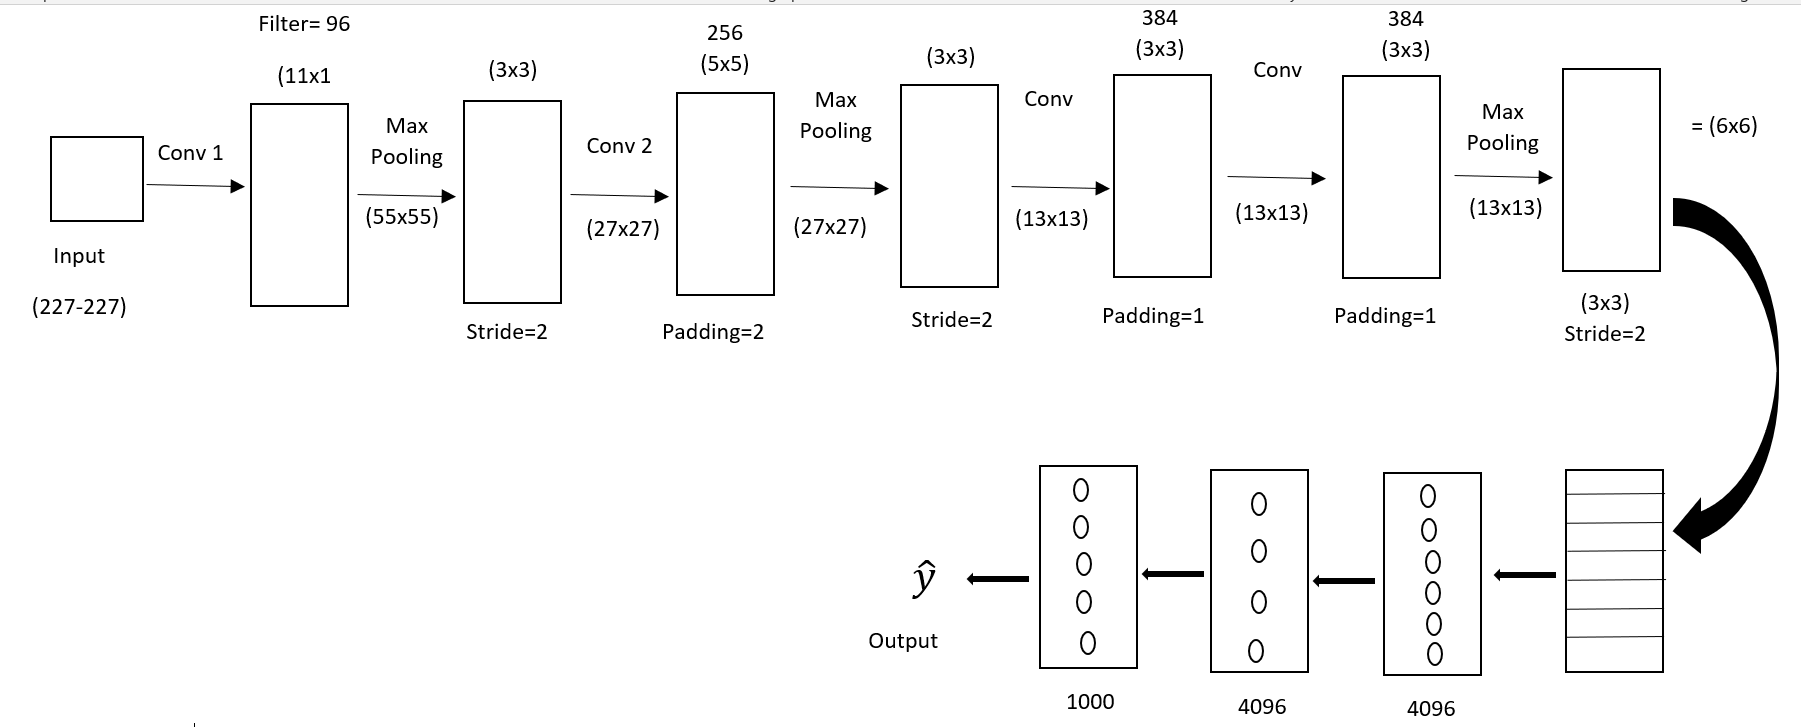

### Formula

$$\bf{\frac{n+2p-f}{s}+1}$$

where,
* **n :** No. of Inputs.
* **p :** No. of Padding.
* **f :** No. Flattern.

### New Items
1. **(11x11), (5x5) Filter**
2. **MaxPooling**
3. **Dropout**
4. **Normalization** $\rightarrow$ **Best local response** $\rightarrow$ **Filter has been increased**.

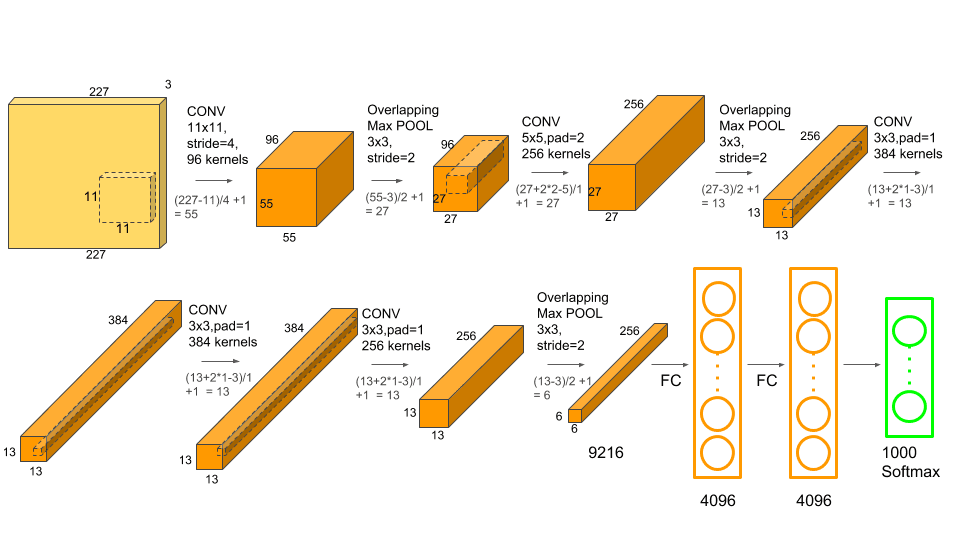

In [1]:
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

In [2]:
!pip install tflearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 107 kB 29.3 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=96302e01a3fe2859162a8c6bb36fe73ff4c70c751841352e3a8e1b060d7e3725
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [3]:
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [4]:
x

array([[[[0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         ...,
         [0.        , 0.02745098, 0.        ],
         [0.00392157, 0.09803922, 0.04313726],
         [0.03529412, 0.19607843, 0.12941177]],

        [[0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         ...,
         [0.00392157, 0.03529412, 0.00784314],
         [0.00392157, 0.09803922, 0.04705882],
         [0.03921569, 0.19607843, 0.12941177]],

        [[0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         [0.00392157, 0.03137255, 0.        ],
         ...,
         [0.00392157, 0.03137255, 0.00392157],
         [0.00392157, 0.09019608, 0.03921569],
         [0.03921569, 0.18431373, 0.12156863]],

        ...,

        [[0.00392157, 0.02352941, 0.        ],
         [0.00392157, 0.02352941, 0.        ]

In [5]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [6]:
x.shape

(1360, 224, 224, 3)

In [7]:
y.shape

(1360, 17)

In [8]:
# Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# Pooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())



# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())


# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))


# Pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())


# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 26, 26, 256)       0

In [9]:
# Compile 
opt = tf.optimizers.Adam(learning_rate = 0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
# Train
model.fit(x, y, batch_size=64, epochs=5, verbose=1,validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/5
1088/1088 [==============================] - ETA: 0s - loss: 8.6052 - acc: 0.1682

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1088/1088 [==============================] - 14s 13ms/sample - loss: 8.6052 - acc: 0.1682 - val_loss: 557777.7904 - val_acc: 0.0846
Epoch 2/5
1088/1088 [==============================] - 1s 1ms/sample - loss: 5.8684 - acc: 0.2243 - val_loss: 41494.1847 - val_acc: 0.0625
Epoch 3/5
1088/1088 [==============================] - 1s 1ms/sample - loss: 5.1493 - acc: 0.2482 - val_loss: 4478.9027 - val_acc: 0.0515
Epoch 4/5
1088/1088 [==============================] - 1s 1ms/sample - loss: 4.0360 - acc: 0.3079 - val_loss: 2056.6413 - val_acc: 0.0625
Epoch 5/5
1088/1088 [==============================] - 1s 1ms/sample - loss: 3.6055 - acc: 0.3327 - val_loss: 507.0878 - val_acc: 0.1140
